In [81]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1
#!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4

#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       [>                   ] (--:--) No change
pkgs/main/linux-

In [72]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


First Question

In [73]:
tesla=yf.Ticker('TSLA')
tesla_data=tesla.history(period='max')
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [110]:
tesla_data.reset_index(inplace=True)
#tesla_data.head()

Second Question

Save the text of the response as a variable named html_data.

In [111]:
#!mamba install html5lib==1.1 -y

url=" https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. "
html_data = requests.get(url).text

Parsing the html data using beautiful_soup.

In [112]:
soup = BeautifulSoup(html_data, "html.parser")

In [114]:
 import pandas as pd
tesla_revenue  =pd.DataFrame(columns=["Date","Revenue"])
for row in soup.find("tbody").find_all('tr'):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    
    tesla_revenue=tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
    
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()    

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


<AxesSubplot:xlabel='Date'>

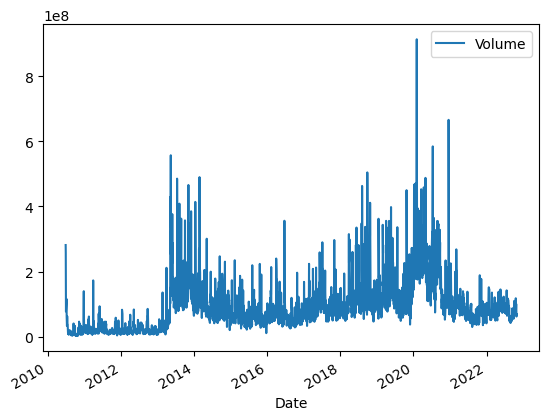

In [117]:
#!pip install nbformat==4.2.0
tesla_data.plot(x="Date", y="Volume")

GME_data

In [64]:
gme=yf.Ticker('GME')
gme_data=tesla.history(period='max')
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


<AxesSubplot:xlabel='Date'>

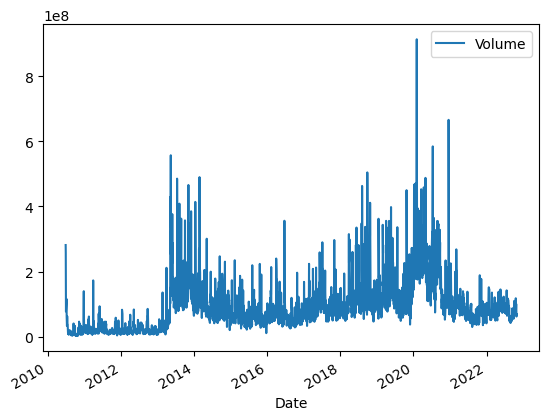

In [120]:
tesla_data.reset_index(inplace=True)
tesla_data.plot(x="Date", y="Volume")

GME_Revenue

In [96]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

#import pandas as pd
gme_revenue  =pd.DataFrame(columns=["Date","Revenue"])
for row in soup.find("tbody").find_all('tr'):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    
    gme_revenue=tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
    
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail() 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Date,Revenue
9,2012,413
10,2011,204
11,2010,117
12,2009,112
13,2005,1843


In [118]:
#gme_data.plot(x="Open", y="Date")
#gme_data.plot(x="Date", y="Volume")